This project involves analyzing the Autism Prediction dataset, performing data preprocessing, implementing classification algorithms, and evaluating model performance. It demonstrates how advanced analytics can drive meaningful insights and support decision-making in healthcare.

- Autism is a neurological disorder that affects a person’s ability to interact with others, make eye contact with others, learn capacity, and other behavioral and social capabilities of a person.
- But there is no ascertain way to tell whether a person has Autism or not because there are no such diagnostics methods available to diagnose this disorder. But what if we use machine learning to predict whether a person suffers from Autism or not?
- Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.
- Pandas – This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.
- Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
- Matplotlib/Seaborn – This library is used to draw visualizations.
- Sklearn – This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.
- XGBoost – This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.
- Imblearn – This module contains a function that can be used for handling problems related to data imbalance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [2]:
#Understanding dataset
df = pd.read_csv('C:/Users/jyots/AI projects/train.csv')

In [3]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [4]:
#inspecting dataset
df.shape

(800, 22)

In [5]:
#800 rows and 22 columns
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [6]:
#Display all columns of Dataframe

pd.set_option('display.max_columns', None)

In [7]:
# See the details of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [8]:
#Converting age to integers
df['age'] = df['age'].astype(int)

In [9]:
df.head(2)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0


In [10]:
#lets print the unique values except age, ID and result.
for col in df.columns:
    numerical_features = ['ID', 'age', 'result']
    if col not in numerical_features:
        print(col, df[col].unique())
        print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [11]:
# Dropping irrelevant columns
df = df.drop(columns=['ID', 'age_desc'])

In [12]:
df.shape

(800, 20)

In [14]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [16]:
# Mapping dictionary for country names
mapping = {
    "Viet Nam" : "Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China"
}

# Replacing the values

df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [18]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [19]:
#Checking the target class distribution

df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

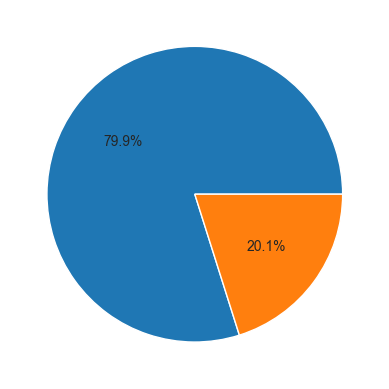

In [20]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()

The dataset we have is highly imbalanced. If we will train our model using this data then the model will face a hard time predicting the positive class which is our main objective here to predict whether a person has autism or not with high accuracy.

In [21]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


Makes huge imbalance, when you put this to a classification problem, model won't be able to identify correctly. To addresss this, do under sampling or upper sampling, we can perform over sampling using SMOTE

Insights
- Missing values found un ethnicity and relation
- age_desc has only one unique value, so removed as it is not important for prediction
- Fixed the wrong country names
- identified class imbalance in the target column

# Exploratory Data Analysis(EDA)


Univariate Analysis

Numerical columns:
- age
- result

In [22]:
#setting the theme
sns.set_theme(style="darkgrid")


Distribution plots

Mean: 27.96375
Median: 24.0


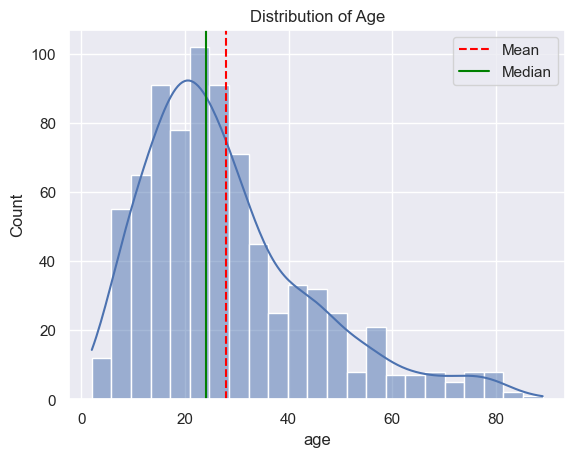

In [23]:
# histogram for age
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# Mean and Median

age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)

# adding vertical lines for mean and median

plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()
plt.show()

Mean: 8.537303106501248
Median: 9.605299308


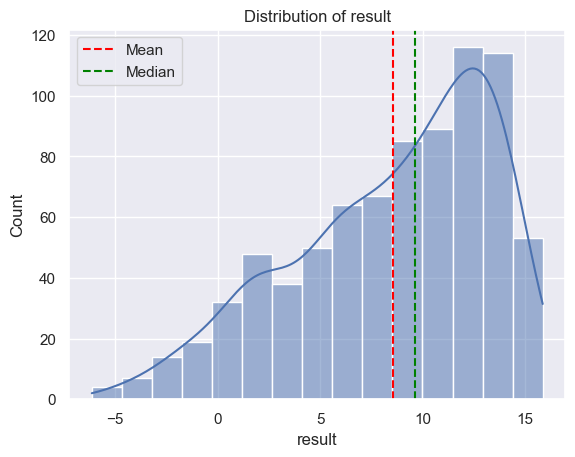

In [24]:
#age has left skew
# histogram for result
sns.histplot(df["result"], kde=True)
plt.title("Distribution of result")

# Mean and Median

result_mean = df["result"].mean()
result_median = df["result"].median()

print("Mean:", result_mean)
print("Median:", result_median)

# adding vertical lines for mean and median

plt.axvline(result_mean, color="red", linestyle="--", label="Mean")
plt.axvline(result_median, color="green", linestyle="--", label="Median")

plt.legend()
plt.show()



Box plots for identifying outliners in numerical columns

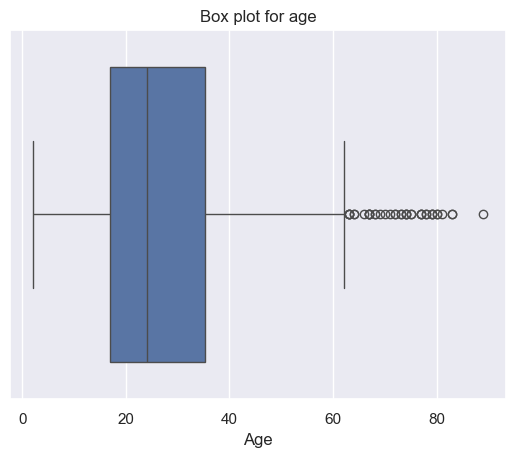

In [25]:

sns.boxplot(x=df["age"])
plt.title("Box plot for age")
plt.xlabel("Age")
plt.show()

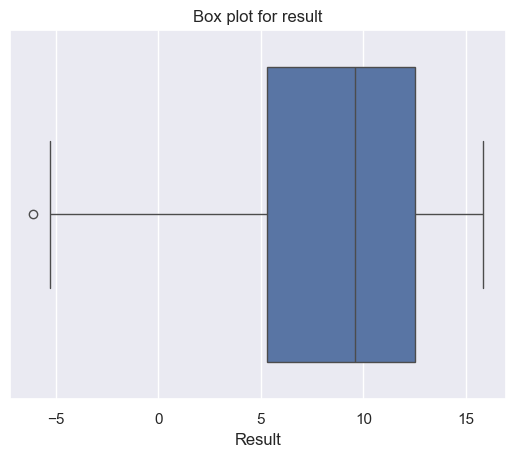

In [26]:
sns.boxplot(x=df["result"])
plt.title("Box plot for result")
plt.xlabel("Result")
plt.show()


Count the outliers using IQR(Interquartile Range) method

In [27]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
len(age_outliers)

39


Outliers in result

In [28]:
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
len(result_outliers)

1


Univariate analysis of categorical features


In [29]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

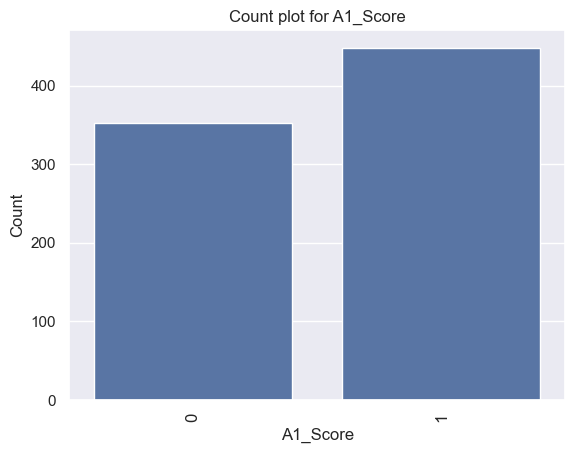

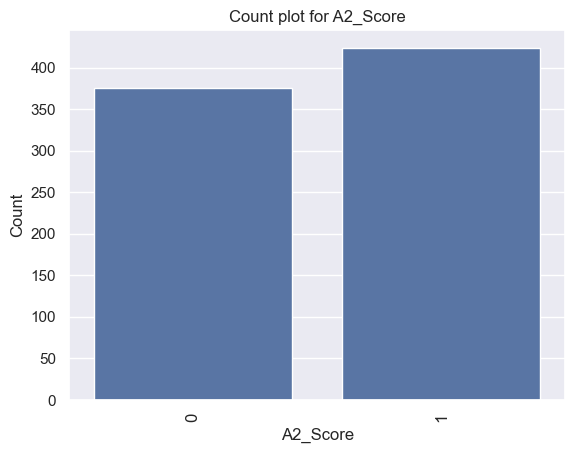

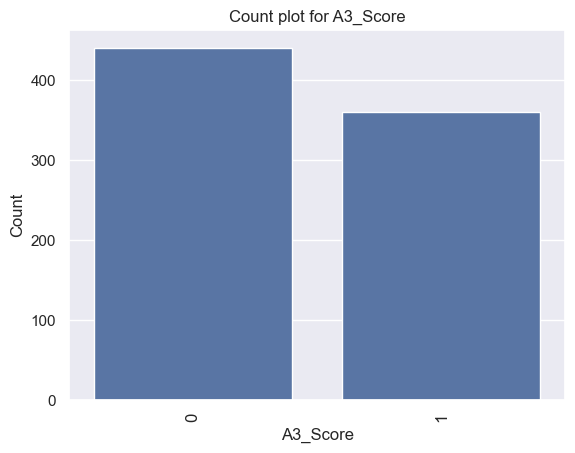

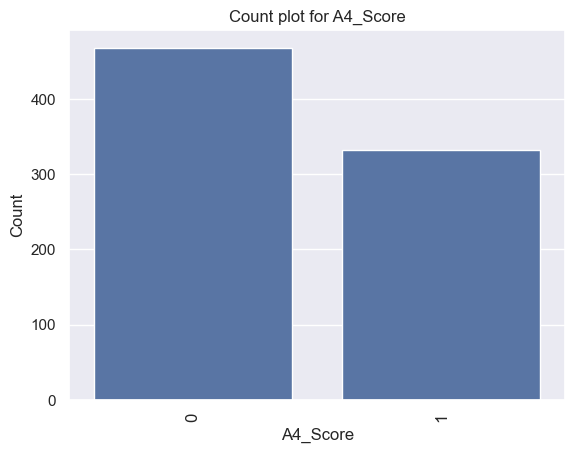

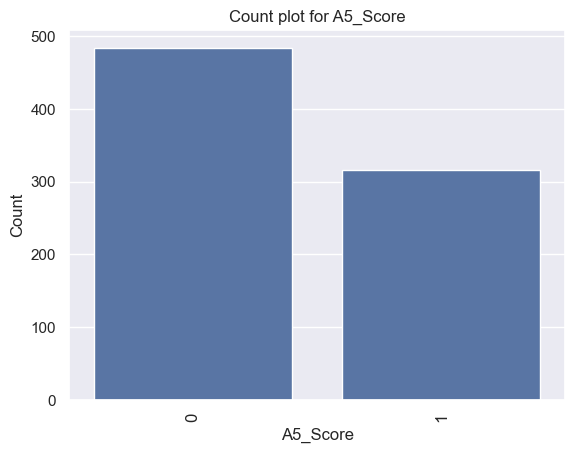

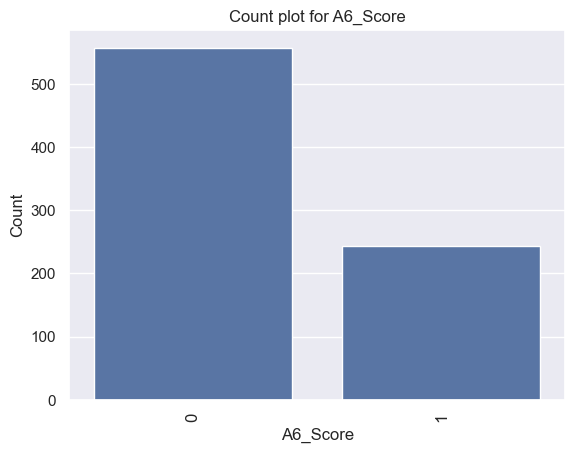

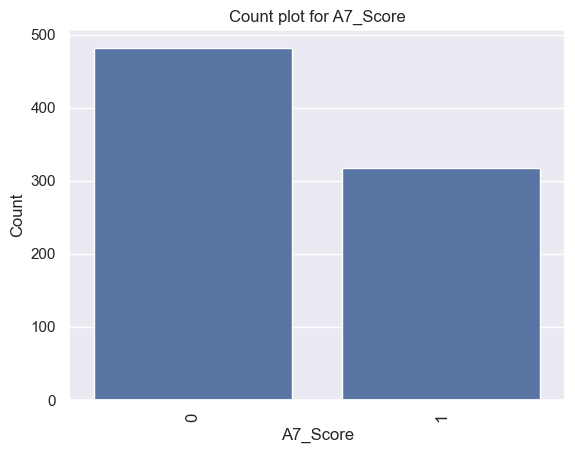

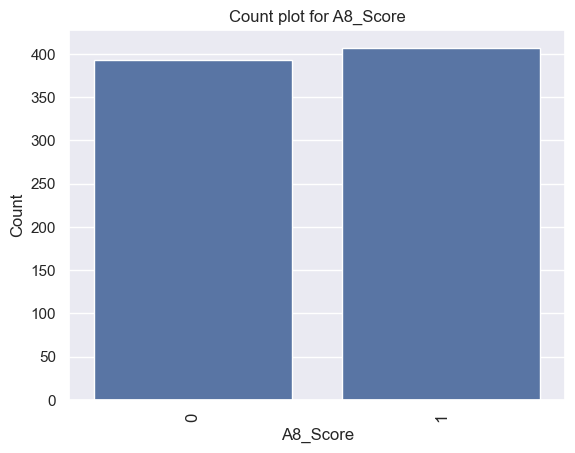

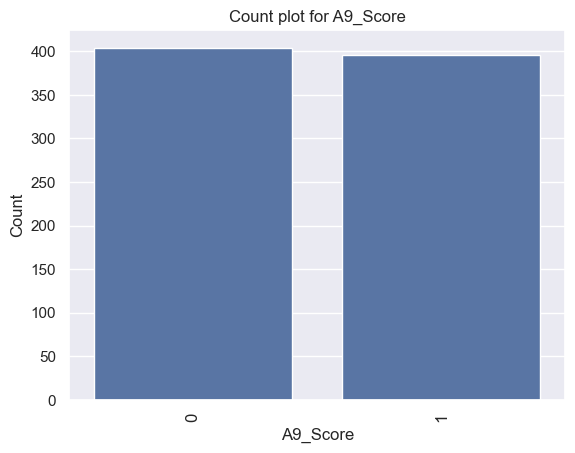

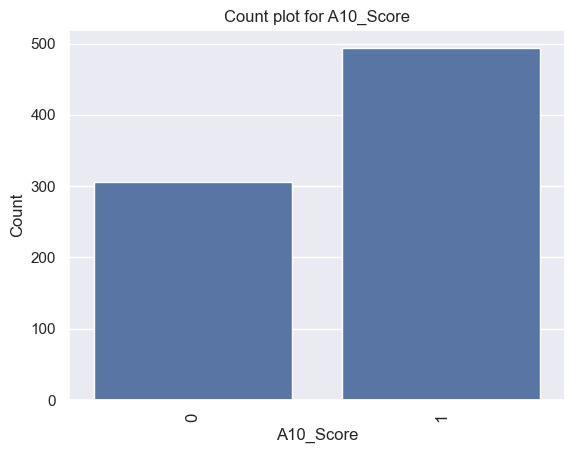

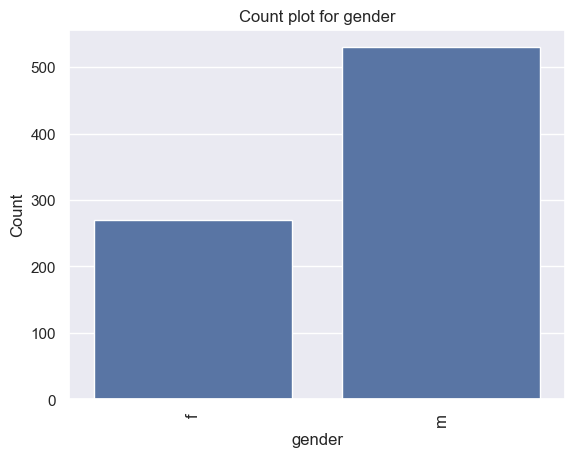

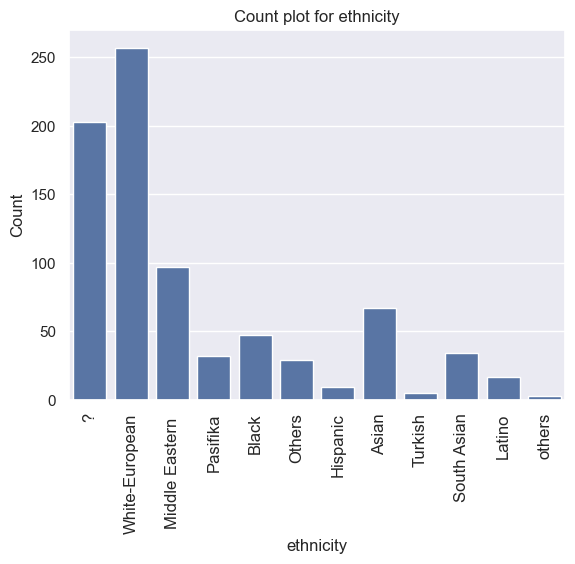

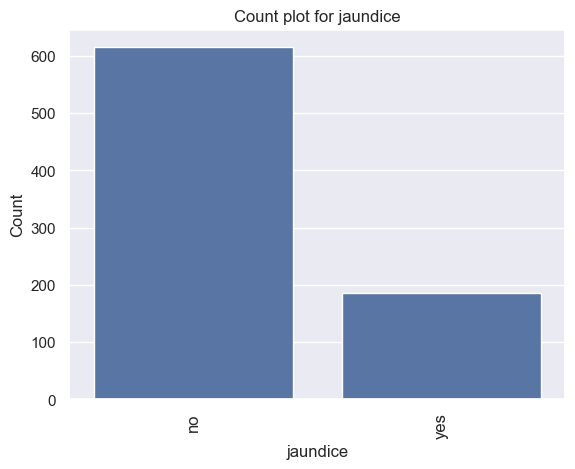

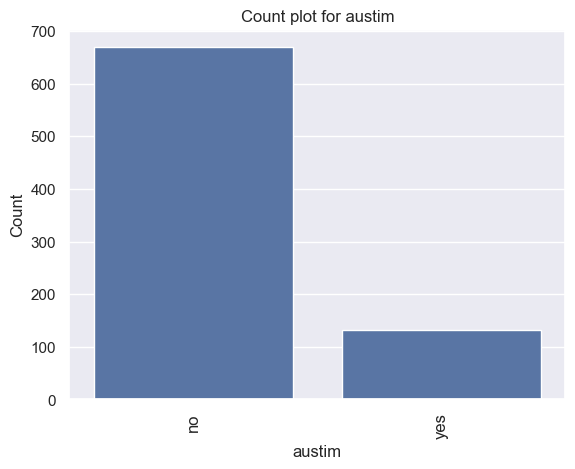

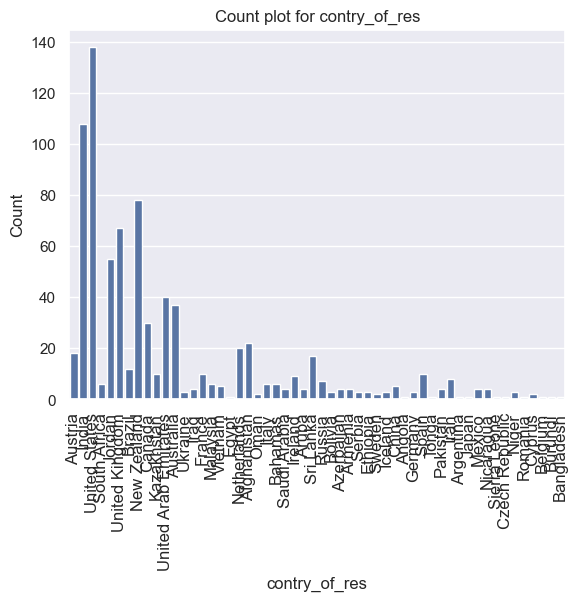

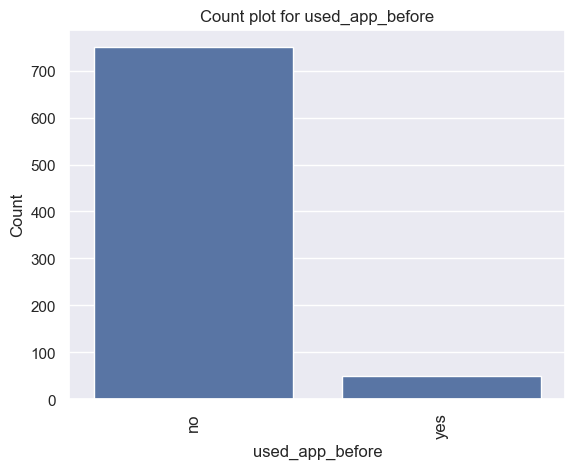

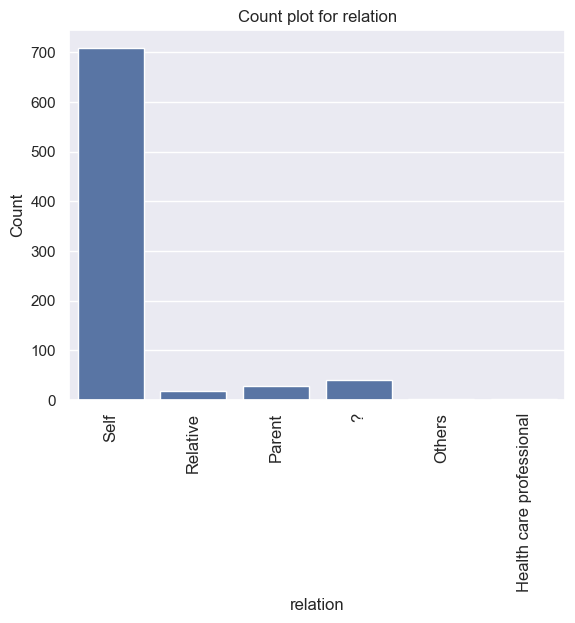

In [31]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

for col in categorical_columns:
    sns.countplot(x=df[col])
    plt.title(f"Count plot for {col}")
    plt.xticks(fontsize=12)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel("Count")
    plt.show()


Count plot for target column

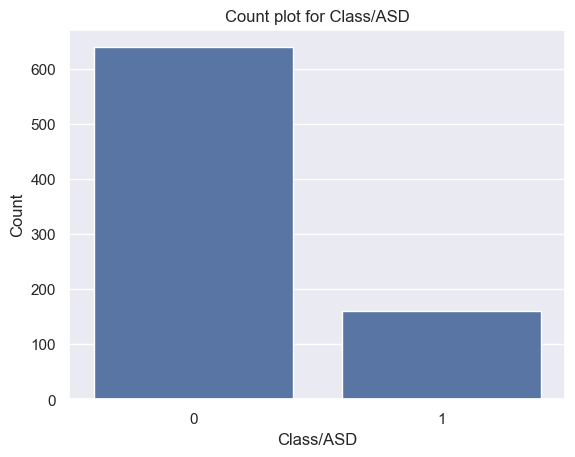

In [32]:
sns.countplot(x=df["Class/ASD"])
plt.title("Count plot for Class/ASD")
plt.xlabel("Class/ASD")
plt.ylabel("Count")
plt.show()

In [33]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64


Handle missing values in ethnicity and relation column


In [34]:
df["ethnicity"] = df["ethnicity"].replace({"?": "Others", "others": "Others"})
df["relation"] = df["relation"].replace({"?": "Others",
                                         "Relative": "Others",
                                         "Parent": "Others",
                                         "Health care professional": "Others"})
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [35]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)


Label Encoding


We can do encoding for our nominal categorical columns

we have to identify string data type coloums. then apply label encoding


In [36]:
#identify columns with "Object" datatype
object_columns = df.select_dtypes(include=["object"]).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [37]:

#initialize a dictionary to store the encoders
encoders = {}

#apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder #saving the encoder for this column

#save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [38]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


The code converts text data in a table into numbers using a tool called LabelEncoder. For each text column, it creates an encoder to map each unique word to a number, replaces the text with these numbers, and stores the encoder in a dictionary. Finally, all the encoders are saved into a file (encoders.pkl) for future use, ensuring consistency when working with similar data later


Bivariate Analysis


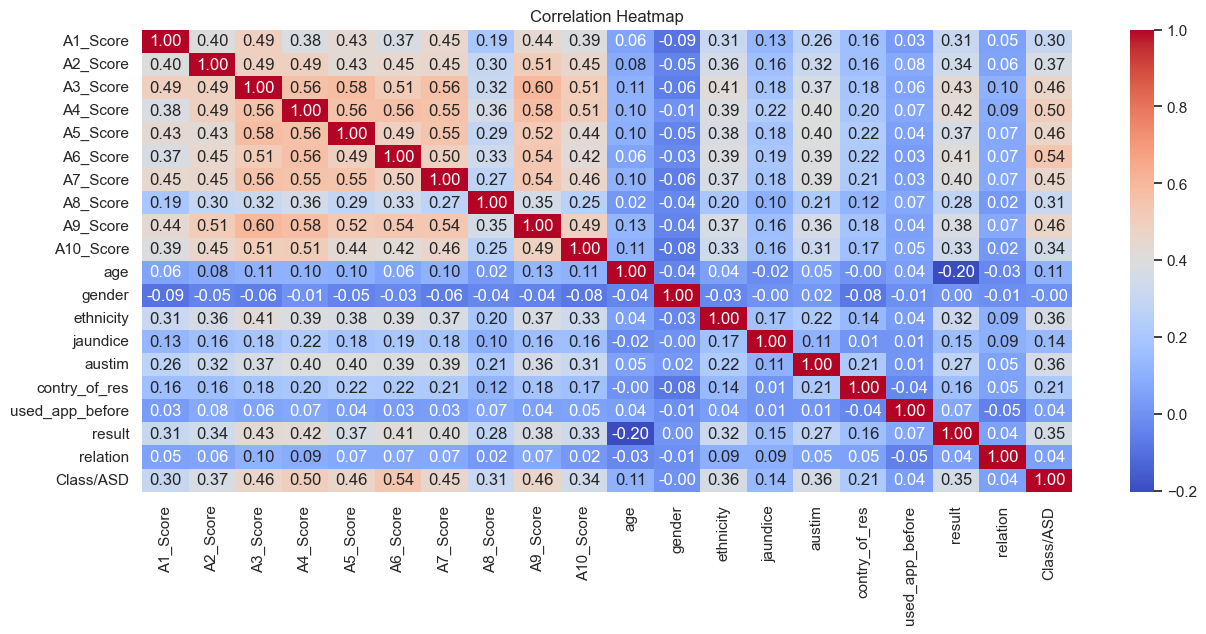

In [39]:
#Correlation matrix
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Data Preprocessing

Handling the outliers

This is the steps to handle the outliers in the dataset

Calculate the IQR (Interquartile Range):
First, calculate the IQR, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3). This helps me understand the spread of the middle 50% of the data.

Define the Outlier Bounds:
Using the IQR,  define a lower bound as ( Q1 - 1.5 \times \text{IQR} ) and an upper bound as ( Q3 + 1.5 \times \text{IQR} ). Any value outside this range is considered an outlier.

Find the Median:
calculate the median of the column because the median is a robust measure of central tendency—it’s not influenced by extreme values, making it perfect for replacing outliers.

Replace Outliers:
For each value in the column, if it’s outside the lower or upper bounds, replace it with the median. If it’s within the range, leave it as is.

This approach is great because it keeps as much data as possible while ensuring that outliers don’t distort the results or affect model performance. It’s a simple yet effective way to handle outliers without removing rows.

In [40]:
# function to replace outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()
    #Replace outliers with median value
    df[column] = df[column].apply(lambda x: median  if x < lower_bound or x > upper_bound else x)
    return df

In [41]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0



Train Test Split

In [42]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

X represents Features and y represents the target coloumn

In [43]:
X = df.drop(columns=["Class/ASD"])
y= df["Class/ASD"]
print(X)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jaundice  austi

In [44]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [46]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [47]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [48]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64


SMOTE(Synthetic Minority Oversampling Technique)

Using SMOTE (Synthetic Minority Oversampling Technique) to address the class imbalance here by generating synthetic samples for the minority class instead of duplicating existing ones. This technique works by selecting instances from the minority class, finding their k-nearest neighbors, and creating new samples along the line segments between them.


In [49]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(y_train_smote.shape)

(1030,)


In [50]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


Training the model

Initial training with default parameters and later hyperparameter tuning

The models dictionary given below contains three machine learning classifiers: DecisionTreeClassifier, RandomForestClassifier, and XGBClassifier, each initialized with a fixed random seed for reproducibility. These models can be used for classification tasks, where each offers different strengths in handling data complexity and performance.

In [51]:
#Dictionary of classifiers

models = {
    "Decision Tree" : DecisionTreeClassifier(random_state=42),
    "Random Forest" : RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

Cross-validation is a technique used to assess the performance of a machine learning model by splitting the data into multiple subsets, training the model on some subsets, and testing it on the remaining ones to ensure it generalizes well.

This code below performs 5-fold cross-validation for each model in the models dictionary (Decision Tree, Random Forest, and XGBoost) using the training data X_train_smote and y_train_smote. It calculates the accuracy for each fold and stores the results in the cv_scores dictionary, while printing the average cross-validation accuracy for each model along with a separator for clarity.

In [52]:
#Dictionary to store the cross validation results

cv_scores = {}

#Perform 5 fold cross validation for each model
for model_name, model in models.items():
    print(f"Training {model_name} with default parameters..")
    scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring="accuracy")
    cv_scores[model_name] = scores
    print(f"{model_name} Cross Validation Accuracy: {np.mean(scores):.2f}")
    print("-"*50)

Training Decision Tree with default parameters..
Decision Tree Cross Validation Accuracy: 0.84
--------------------------------------------------
Training Random Forest with default parameters..
Random Forest Cross Validation Accuracy: 0.90
--------------------------------------------------
Training XGBoost with default parameters..
XGBoost Cross Validation Accuracy: 0.89
--------------------------------------------------


In [53]:
cv_scores

{'Decision Tree': array([0.76699029, 0.8592233 , 0.84951456, 0.87378641, 0.84951456]),
 'Random Forest': array([0.88349515, 0.92718447, 0.89805825, 0.90291262, 0.91262136]),
 'XGBoost': array([0.83980583, 0.9223301 , 0.89320388, 0.89805825, 0.91262136])}

The cross-validation results show the following average accuracies for each model:

Decision Tree: The accuracy scores range from 0.81 to 0.89, with an average around 0.86.

Random Forest: The accuracy scores are consistently high, ranging from 0.88 to 0.93, with an average of approximately 0.91.

XGBoost: The accuracy scores range from 0.87 to 0.92, with an average of about 0.90.

Overall, Random Forest performed the best, followed by XGBoost, with Decision Tree showing relatively lower performance.

Model Selection and hyperparameter tuning

In [54]:
#initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [55]:
#HHyperparameter grids for RandomizedsearchCV
param_grid_dt = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1,2,4]
}

param_grid_rf = {
    "n_estimators": [50, 100, 200, 50],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4],
    "bootstrap" : [True, False]

}

param_grid_xgb = {
    "n_estimators" : [50, 100, 200, 50],
    "max_depth" : [3, 5, 7, 10],
    "learning rate" : [0.01, 0.1, 0.2, 0.3],
    "subsample" : [0.5, 0.7, 1.0],
    "colsample_bytree" : [0.5, 0.7, 1.0]
    
}

The code defines hyperparameter grids for three machine learning models: Decision Tree, Random Forest, and XGBoost, which will be used for hyperparameter tuning through RandomizedSearchCV.

Decision Tree Hyperparameter Grid (param_grid_dt):

- criterion: Defines the function to measure the quality of a split, with options "gini" (Gini impurity) or "entropy" (information gain).
- max_depth: Limits the maximum depth of the tree. A value of None means no limit, and other values like 10, 20, etc., limit the depth.
- min_samples_split: The minimum number of samples required to split an internal node. This controls tree growth by forcing splits with a minimum number of samples.
- min_samples_leaf: The minimum number of samples required to be at a leaf node. This prevents overfitting by ensuring that leaves have enough data.


Random Forest Hyperparameter Grid (param_grid_rf):

- n_estimators: The number of trees in the forest. Values like 50, 100, 200, 500 control the forest size, affecting performance and computation time.
- max_depth: Similar to Decision Tree, it controls the maximum depth of each tree in the forest.
- min_samples_split and min_samples_leaf: Same as in Decision Tree, these parameters control how nodes split and how leaves are formed.
- bootstrap: Whether to use bootstrap sampling (sampling with replacement) for training each tree. True means bootstrapping is used; False means each tree is trained on the full dataset.

XGBoost Hyperparameter Grid (param_grid_xgb):

- n_estimators: The number of boosting rounds or trees to build.
- max_depth: The maximum depth of each tree. Higher values allow more complex models.
- learning_rate: Controls the contribution of each tree to the overall prediction. Lower values make the model more robust but may require more trees.
- subsample: The fraction of samples to use for training each tree. Lower values prevent overfitting by introducing randomness.
- colsample_bytree: The fraction of features to use when training each tree. This can also prevent overfitting by introducing randomness in feature selection.

Purpose:
- These hyperparameter grids allow you to tune each model's settings and find the best combination of hyperparameters to improve model performance.
- RandomizedSearchCV will sample from these grids and try different combinations of hyperparameters, optimizing model performance based on cross-validation results.

In summary, the code prepares a set of hyperparameters for each model, which will later be used for tuning and improving the performance of the models.

In [56]:
#hyperparameter tuning for 3 tree based models
#The below steps can be automated by using a for loop or by using a pipeline Perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_dt, n_iter=10, cv=5, scoring="accuracy", random_state=42)

The code is performing hyperparameter tuning for three tree-based models (Decision Tree, Random Forest, and XGBoost) using RandomizedSearchCV.

RandomizedSearchCV:

- RandomizedSearchCV is used for hyperparameter optimization by randomly sampling from a given range of hyperparameters. Unlike GridSearchCV, which exhaustively searches all combinations of parameters, RandomizedSearchCV randomly selects a specified number of combinations (n_iter) and evaluates them, making it faster when there are large hyperparameter grids.
- The primary objective is to find the best combination of hyperparameters that maximizes model performance (in this case, accuracy).

RandomizedSearchCV for Decision Tree (random_search_dt):

- estimator=decision_tree: Specifies the Decision Tree model for tuning.
- param_distributions=param_grid_dt: This is the hyperparameter grid for Decision Tree (param_grid_dt), which defines possible values for parameters like criterion, max_depth, min_samples_split, and min_samples_leaf.
- n_iter=20: Randomly samples 10 different combinations of hyperparameters from the grid.
- cv=5: Uses 5-fold cross-validation to evaluate model performance.
- scoring="accuracy": The metric to optimize is accuracy.
- random_state=42: Ensures reproducibility of the random search process.

RandomizedSearchCV for Random Forest (random_search_rf):

- estimator=random_forest: Specifies the Random Forest model for tuning.
- param_distributions=param_grid_rf: Uses the hyperparameter grid defined for Random Forest (param_grid_rf), which includes parameters such as n_estimators, max_depth, min_samples_split, min_samples_leaf, and bootstrap.
- The other arguments are the same as for Decision Tree, meaning it uses 5-fold cross-validation, accuracy as the evaluation metric, and 10 random combinations of parameters.

RandomizedSearchCV for XGBoost (random_search_xgb):

- estimator=xgboost_classifier: Specifies the XGBoost model for tuning.
- param_distributions=param_grid_xgb: Uses the hyperparameter grid defined for XGBoost (param_grid_xgb), which includes - -  - n_estimators, max_depth, learning_rate, subsample, and colsample_bytree.
- The other arguments are the same as for the other two models.

Summary:

The code sets up RandomizedSearchCV for each model (Decision Tree, Random Forest, and XGBoost) to search for the best combination of hyperparameters over 10 random iterations. It uses 5-fold cross-validation to evaluate each combination based on accuracy, ensuring a robust evaluation of the models' performances with different hyperparameters. This process will help in selecting the most optimal settings for each model.

In [57]:
#fit the models
random_search_dt.fit(X_train_smote, y_train_smote)
random_search_rf.fit(X_train_smote, y_train_smote)
random_search_xgb.fit(X_train_smote, y_train_smote)

C:\Users\jyots\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:39:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\jyots\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\jyots\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:39:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "criterion", "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\jyots\AppData\Local\Programs\Py

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 10, 20, 30, 50, 70],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [58]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
0.8398058252427185
RandomForestClassifier(max_depth=70, random_state=42)
0.904854368932039


In [59]:
#get the model with best score

best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
    best_model = random_search_dt.best_estimator_
    best_score = random_search_dt.best_score_
    
if random_search_rf.best_score_ > best_score:
    best_model = random_search_rf.best_estimator_
    best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
    best_model = random_search_xgb.best_estimator_
    best_score = random_search_xgb.best_score_
    


In [60]:
print(f"Best Model: {best_model}")
print(f"Best cross validation accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(max_depth=70, random_state=42)
Best cross validation accuracy: 0.90


In [61]:
#save the best model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

Model Evaluation


In [62]:
#Evaluate on test data
y_test_pred = best_model.predict(X_test)
print("Accuracy score:\n", accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy score:
 0.825
Confusion Matrix:
 [[106  18]
 [ 10  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.85      0.88       124
           1       0.59      0.72      0.65        36

    accuracy                           0.82       160
   macro avg       0.75      0.79      0.77       160
weighted avg       0.84      0.82      0.83       160



The model shows good overall accuracy (80%) and performs well for class 0, but there is room for improvement in predicting class 1, as reflected by lower precision, recall, and F1-score for that class. The weighted average metrics suggest the model is performing reasonably well across all classes

In [63]:
# Load the model and make predictions
with open("C:/Users/jyots/AI projects/best_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Example prediction (using first test sample)
# Not Autistic result
sample_input1 = X_test.iloc[0:1]
predicted_label1 = loaded_model.predict(sample_input1)
print("Predicted label1:", predicted_label1)

# Autistic result
sample_index = y_test[y_test == 1].index[0]  # Get the first occurrence of label 1
sample_input2 = X_test.loc[[sample_index]]  # Extract the corresponding features
predicted_label2 = loaded_model.predict(sample_input2)
print("Predicted label2:", predicted_label2)

Predicted label1: [0]
Predicted label2: [1]


In [64]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')